In [34]:
import os
import re
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random
from networkx.drawing.nx_agraph import graphviz_layout

In [35]:
class Person:
    def __init__(self, id, name, partner, father, mother):
        self.id = id
        self.name = name
        self.partner = partner
        self.father = father
        self.mother = mother
    def __str__(self):
        if self.mother != None:
            return self.id + ', ' + self.name + ', ' + " ".join(str(x) for x in self.partner) + ', ' + self.father + ', ' + self.mother
        else:
            return self.id + ', ' + self.name + ', ' + " ".join(str(x) for x in self.partner)

In [36]:
for filename in os.listdir():
    if '.csv' not in filename:
        continue
    file = open(filename,'r')
    
    #Header
    file.readline()
    
    #Array to store family members
    members = []
    
    for line in file:
        line = line.rstrip()
        if line:
            
            #Row (family member)
            parameters = re.split(r';', line)
            
            #They can have more than one partner (married more than once)
            partners = [] 
            if not parameters[2] == '':
                for p in parameters[2].split(','):
                    partners.append(p)
            
            #We don't have father nor mother
            if parameters[3] == '' and parameters[4] == '':
                members.append(Person(parameters[0],parameters[1],partners,None,None))
            else:
                members.append(Person(parameters[0],parameters[1],partners,parameters[3],parameters[4]))                           

In [37]:
def draw_tree(G):
    figure(num=None, figsize=(24, 18), dpi=100, facecolor='w', edgecolor='k')
    
    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]

    pos=graphviz_layout(G, prog='dot')
    nx.draw(G, pos, edge_color=colors, with_labels = True)
    plt.savefig('images/family_tree.png')

In [38]:
def find_root_node(G):
    root = ''
    for node in G.nodes():
        degree = G.in_degree(node)
        if degree == 1:
            partner,node = list(G.in_edges(node))[0]
            if G.in_degree(partner) == 1:
                root = node
                return root
    

In [39]:
G = nx.Graph()

#We add all the members to the network
for mem in members:
    G.add_node(mem.id)
    
#We add all partner associations
for mem in members:
    partners = mem.partner
    for p in partners:
        G.add_edge(mem.id,p,color='green')

#We add all the siblings associations
for mem in members:
    if mem.mother != None:
        G.add_edge(mem.mother,mem.id,color='blue')
        G.add_edge(mem.father,mem.id,color='blue')

#draw_tree(G)

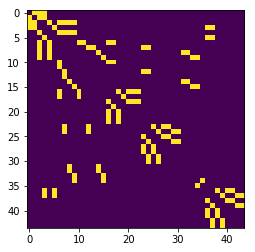

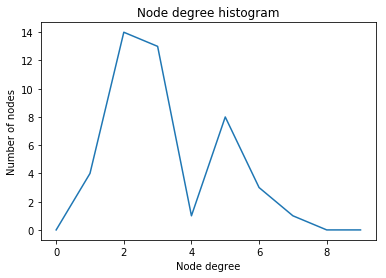

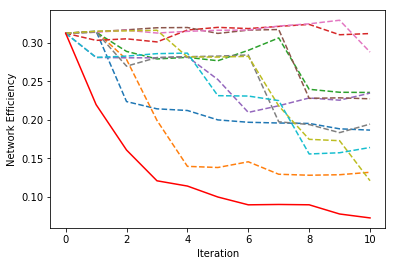

In [50]:
#2
#Transform graph to a matrix
A = nx.to_numpy_matrix(G)

#Display adjancency matrix
plt.imshow(A)
plt.savefig('images/adj_matrix.png')
plt.show()

degree = np.zeros((10,))

#Plot degree distribution
for i in range(0,len(G.nodes())):
    degree[int(np.sum(A[i]))] += 1
plt.plot(degree)
plt.xlabel('Node degree')
plt.ylabel('Number of nodes')
plt.title('Node degree histogram')
plt.savefig('images/degree_histogram.png')
plt.show()


#We analize how network efficiency is affected by
#Removing randomly 10 nodes.
#We do it 10 times
for t in range(0,10):
    G_c = G.copy()
    efficiency = []
    efficiency.append(nx.global_efficiency(G_c))

    for r in range(0,10):
        node_to_remove = random.randint(1,len(G_c.nodes()))
        G_c.remove_node(list(G_c.nodes())[node_to_remove - 1])
        efficiency.append(nx.global_efficiency(G_c))

    plt.plot(efficiency,'--')

#We now analize how network efficiency is affected by
#Removing nodes ordered from highest to lowest degree

degree = []

for node in G.nodes():
    degree.append(tuple((node,G.degree(node))))

degree = sorted(degree,reverse=True, key=lambda tup: tup[1])

G_c = G.copy()
efficiency = []
efficiency.append(nx.global_efficiency(G_c))
for n in range(0,10):
    G_c.remove_node(degree[n][0])
    efficiency.append(nx.global_efficiency(G_c))
plt.plot(efficiency,'r')

plt.ylabel('Network Efficiency')
plt.xlabel('Iteration')
plt.savefig('images/exercice2.png')
plt.show()
